In [32]:
import os
import datetime
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import urllib.parse
import matplotlib.pyplot as plt

load_dotenv()
POSTGRES_USERNAME = os.environ.get('JDB_USER')
POSTGRES_PASSWORD = os.environ.get('JDB_PASSWORD')
POSTGRES_ADDRESS = os.environ.get('JDB_HOST')
POSTGRES_PORT = 5432
POSTGRES_DBNAME = os.environ.get('JDB_NAME')
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres_str)

# Current Population

In [65]:
stays = pd.read_sql_query('select * from stays_summarized where end_date is null and is_pretrial = 1 and not_primary_custodian = 0;', cnx)

In [66]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
y

,
Week or less,65
8-30 days,81
31-90 days,89
Over 90 days,116


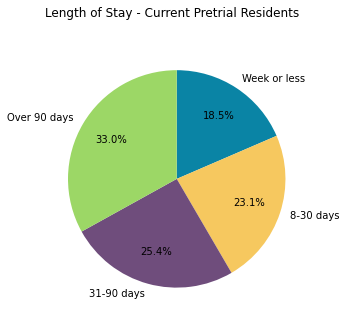

In [67]:
y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Length of Stay - Current Pretrial Residents", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-current-residents-length-of-stay.png', bbox_inches='tight')

In [68]:
bstays = stays.loc[stays["race"]=="B" ].copy()
btmp = [len(bstays[bstays['days'] <= 7]), 
       len(bstays[(bstays['days'] <= 30) & (bstays['days'] > 7)]),
       len(bstays[(bstays['days'] <= 90) & (bstays['days'] > 30)]),
       len(bstays[bstays['days'] > 90])]
bx = pd.Series(btmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
by = pd.DataFrame(bx)
by

,
Week or less,13
8-30 days,25
31-90 days,22
Over 90 days,45


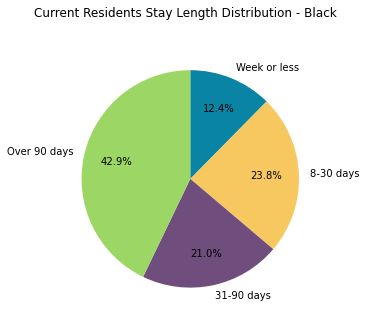

In [75]:
by.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Current Residents Stay Length Distribution - Black", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/current-pretrial-black-residents-length-of-stay.png', bbox_inches='tight')

In [70]:
wstays = stays.loc[stays["race"]=="W" ].copy()
wtmp = [len(wstays[wstays['days'] <= 7]), 
       len(wstays[(wstays['days'] <= 30) & (wstays['days'] > 7)]),
       len(wstays[(wstays['days'] <= 90) & (wstays['days'] > 30)]),
       len(wstays[wstays['days'] > 90])]
wx = pd.Series(wtmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
wy = pd.DataFrame(wx)
wy

,
Week or less,52
8-30 days,53
31-90 days,65
Over 90 days,71


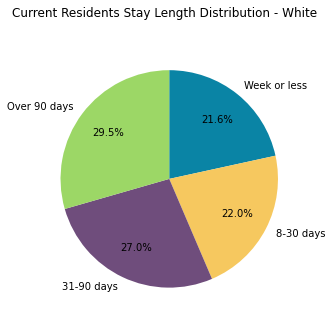

In [76]:
wy.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Current Residents Stay Length Distribution - White", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/current-pretrial-white-residents-length-of-stay.png', bbox_inches='tight')

In [72]:
mtmp = [len(stays[stays['max_level'] == 0]), 
       len(stays[(stays['max_level'] >= 1) & (stays['max_level'] <= 4)]),
       len(stays[(stays['max_level'] >= 5) & (stays['max_level'] <= 6)]),
       len(stays[stays['max_level'] > 6])]
mx = pd.Series(mtmp, name='', index=['Zero', 'Misd', 'Low Felony', 'High Felony'])
my = pd.DataFrame(mx)
my

,
Zero,47
Misd,70
Low Felony,105
High Felony,129


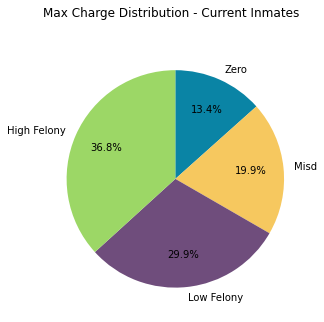

In [77]:
my.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Max Charge Distribution - Current Inmates", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-max-charge-distribution-current-inmates.png', bbox_inches='tight')

# Analysis of Completed Stays

In [79]:
stays = pd.read_sql_query('select * from stays_summarized where is_pretrial = 1 and not_primary_custodian = 0 and end_date is not null;', cnx)

In [80]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
y

,
Week or less,5210
8-30 days,1878
31-90 days,1181
Over 90 days,521


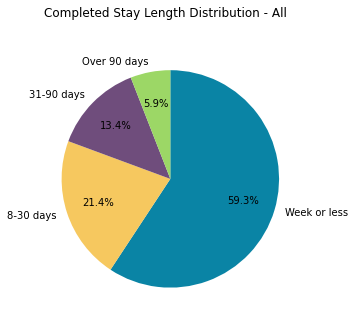

In [81]:
y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Completed Stay Length Distribution - All", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-completed-stays-length-of-stay.png', bbox_inches='tight')

In [82]:
bstays = stays.loc[stays["race"]=="B" ].copy()

In [83]:
btmp = [len(bstays[bstays['days'] <= 7]), 
       len(bstays[(bstays['days'] <= 30) & (bstays['days'] > 7)]),
       len(bstays[(bstays['days'] <= 90) & (bstays['days'] > 30)]),
       len(bstays[bstays['days'] > 90])]
bx = pd.Series(btmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
by = pd.DataFrame(bx)
by

,
Week or less,948
8-30 days,376
31-90 days,255
Over 90 days,161


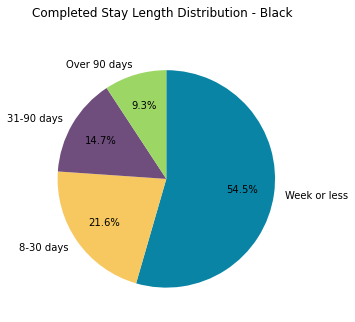

In [84]:
by.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Completed Stay Length Distribution - Black", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-black-residents-length-of-stay.png', bbox_inches='tight')

In [85]:
wstays = stays.loc[stays["race"]=="W" ].copy()

In [86]:
wtmp = [len(wstays[wstays['days'] <= 7]), 
       len(wstays[(wstays['days'] <= 30) & (wstays['days'] > 7)]),
       len(wstays[(wstays['days'] <= 90) & (wstays['days'] > 30)]),
       len(wstays[wstays['days'] > 90])]
wx = pd.Series(wtmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
wy = pd.DataFrame(wx)
wy

,
Week or less,4177
8-30 days,1464
31-90 days,909
Over 90 days,355


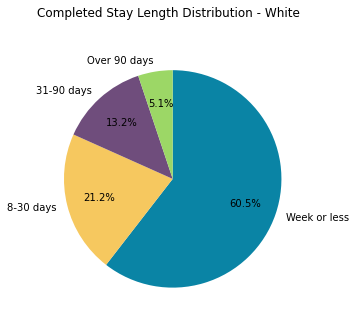

In [87]:
wy.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Completed Stay Length Distribution - White", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-white-residents-length-of-stay.png', bbox_inches='tight')

In [88]:
mtmp = [len(stays[stays['max_level'] == 0]), 
       len(stays[(stays['max_level'] >= 1) & (stays['max_level'] <= 4)]),
       len(stays[(stays['max_level'] >= 5) & (stays['max_level'] <= 6)]),
       len(stays[stays['max_level'] > 6])]
mx = pd.Series(mtmp, name='', index=['Zero', 'Misd', 'Low Felony', 'High Felony'])
my = pd.DataFrame(mx)
my

,
Zero,1236
Misd,4096
Low Felony,2359
High Felony,1099


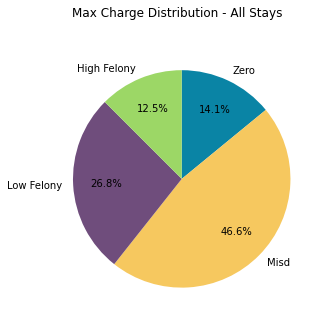

In [89]:
my.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Max Charge Distribution - All Stays", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-max-charge-distribution-all-stays.png', bbox_inches='tight')